In [ ]:
!pip install textblob
!python -m textblob.download_corpora
import gensim
from gensim import corpora
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
# Cleaning and preprocessing
def processRow(row):
  import re
  import nltk
  from textblob import TextBlob
  from nltk.corpus import stopwords
  from nltk.stem import PorterStemmer
  from textblob import Word
  from nltk.util import ngrams
  import re
  from nltk.tokenize import word_tokenize
  from nltk.stem import WordNetLemmatizer
  review = row

  #Lower case
  review.lower()

  #Removes unicode strings like "\u002c"  -> ,(comma)
  review = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', review)
      
  # Removes non-ascii characters. note : \x00 to \x7f is 00 to 255
  # non-ascii characters like copyrigth symbol, trademark symbol
  review = re.sub(r'[^\x00-\x7f]',r'',review)
                
  #convert any url to URL
  review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',review)
                
  #Convert any @Username to "AT_USER"
  review = re.sub('@[^\s]+','AT_USER',review)

  #Remove additional white spaces
  review = re.sub('[\s]+', ' ', review)
  review = re.sub('[\n]+', ' ', review)

  #Remove not alphanumeric symbols white spaces
  review = re.sub(r'[^\w]', ' ', review)

  #Removes hastag in front of a word """
  review = re.sub(r'#([^\s]+)', r'\1', review)

  #Replace #word with word
  review = re.sub(r'#([^\s]+)', r'\1', review)

  #Removes all possible emoticons
  review = re.sub(':\)|:\(|:\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', review)
  #remove numbers -> this is optional
  review = ''.join([i for i in review if not i.isdigit()])

  #remove multiple exclamation -> this is optional
  review = re.sub(r"(\!)\1+", ' ', review)

  #remove multiple question marks -> this is optional
  review = re.sub(r"(\?)\1+", ' ', review)

  #remove multistop -> this is optional
  review = re.sub(r"(\.)\1+", ' ', review)

  #trim
  review = review.strip('\'"')
  print(review) 

            
  row = review
  return row



<input>:33: DeprecationWarning: invalid escape sequence \.
<input>:33: DeprecationWarning: invalid escape sequence \.
<input>:33: DeprecationWarning: invalid escape sequence \.
<input>:33: DeprecationWarning: invalid escape sequence \.
<input>:33: DeprecationWarning: invalid escape sequence \.
<input>:33: DeprecationWarning: invalid escape sequence \.
<input>:33: DeprecationWarning: invalid escape sequence \.
<input>:33: DeprecationWarning: invalid escape sequence \.
<input>:33: DeprecationWarning: invalid escape sequence \.
<input>:33: DeprecationWarning: invalid escape sequence \.
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:33: DeprecationWarning: invalid escape sequence \.
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:33: DeprecationWarning: invalid escape sequence \.
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:33: DeprecationWarning: invalid escape sequence \.
<input>:36: DeprecationWarning: invalid escape sequence 

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
from google.colab import files
#files.upload()
import pandas as pd

reviewData = pd.read_csv("sample_data/amazon_alexa.csv", sep='\t')

reviewData.columns

reviewData.loc[(reviewData['rating']==3)]

,rating,date,variation,verified_reviews,feedback
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
24,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1
33,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
49,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1
54,3,30-Jul-18,Sandstone Fabric,like google better,1
...,...,...,...,...,...
3059,3,30-Jul-18,White Dot,Works well. Just disappointed with the speaker...,1
3068,3,30-Jul-18,White Dot,I was hoping the cord was white also. Otherwis...,1
3114,3,30-Jul-18,Black Dot,,1
3122,3,30-Jul-18,Black Dot,I dislike that it confuses my requests all the...,1


In [ ]:
# checking if there any null values in the dataset

reviewData.isnull().any().any()


False

In [ ]:
import numpy as np 
# clean your verified_reviews
cleaned_verified_reviews = []

for line in reviewData['verified_reviews'] :
    cleanLine = processRow(line) 
    cleaned_verified_reviews.append(cleanLine)
    
   
reviewData['cleaned_verified_reviews'] = np.asarray(cleaned_verified_reviews)

reviewData

Love my Echo 
Loved it 
Sometimes while playing a game  you can answer a question correctly but Alexa says you got it wrong and answers the same as you  I like being able to turn lights on and off while away from home 
I have had a lot of fun with this thing  My  yr old learns about dinosaurs  i control the lights and play games like categories  Has nice sound when playing music as well 
Music
I received the echo as a gift  I needed another Bluetooth or something to play music easily accessible  and found this smart speaker  Cant wait to see what else it can do 
Without having a cellphone  I cannot use many of her features  I have an iPad but do not see that of any use  It IS a great alarm  If u r almost deaf  you can hear her alarm in the bedroom from out in the living room  so that is reason enough to keep her It is fun to ask random questions to hear her response  She does not seem to be very smartbon politics yet 
I think this is the th one I ve purchased  I m working on getting on

,rating,date,variation,verified_reviews,feedback,cleaned_verified_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,Perfect for kids adults and everyone in betwe...
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,Listening to music searching locations check...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,I do love these things i have them running my...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,Only complaint I have is that the sound qualit...


In [ ]:
#pre processing steps like lower case and lemmatization
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import Word
reviewData['cleaned_verified_reviews'] = reviewData['cleaned_verified_reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))

stop = stopwords.words('english')
new_stop = ['ive','iy','jimmy','jetsons','kasa','kwikset','la','l','lifht','lleg','lm','lo','logra','mids','mltiples','motown','muy','n','naa','naw','nbc','mc','nd','ne','nfl','ni','nj','npr','nrw','ny','ob','','on','e','olor','ontrac','overa','pueden','pur','qued','quot','rapidex','roku','rokus', 'semanaa','settins','sh','sf','solucin','sonos','ssdi','st','su','tardis','tec','tq','tge','th','tp','ttulos','usde','vez','viceo','weve','wei','yr','zzzz','zzzzzzz','yr','z','xm','x','im', 'also', 'able', 'get', 'u', 'could', 'question', 'abay', 'abc', 'ac', 'arlo', 'atencin', 'ase', 'atrs', 'bos', 'cardsrotate', 'camelot', 'bt', 'buld', 'cambiar ', 'chacho', 'comeletely', 'como', 'conectado', 'cordthank', 'dec', 'denon', 'dhiw', 'divertido', 'dj', 'dont', 'dotis', 'dylan', 'ecobee', 'ecoo', 'eeaanh', 'em', 'en', 'eg', 'el', 'esp', 'escencia', 'eqipo', 'est', 'esta', 'estar', 'este', 'estudio', 'etci', 'etekcity', 'fios', 'hal', 'hcfe', 'hdm', 'gel', 'turn', 'go']
total_stop = stop + new_stop
reviewData['cleaned_verified_reviews'] = reviewData['cleaned_verified_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in total_stop))

reviewData['cleaned_verified_reviews'] = reviewData['cleaned_verified_reviews'].apply(lambda x: " ".join([Word(word).lemmatize(pos="v") for word in x.split()]))

reviewData['cleaned_verified_reviews'].head()

reviewData

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,rating,date,variation,verified_reviews,feedback,cleaned_verified_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,love
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes play game answer correctly alexa say...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing old learn dinosaurs control ligh...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect kid adults everyone
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listen music search locations check time look ...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,love things run entire home tv light thermosta...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,complaint sound quality great mostly use comma...


In [ ]:
# Let's define our sentiment analyzer function:
from textblob import TextBlob
def analyze_sentiment(cleaned_verified_reviews):
    analysis = TextBlob(cleaned_verified_reviews)
    if analysis.sentiment.polarity < 0:
        return 'Negative'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
# Lets find the Sentiment by calling the above defn fn.
# create a new column called 'Sentiment'
reviewData['Sentiment'] = reviewData['cleaned_verified_reviews'].apply(lambda x: analyze_sentiment(x))

# reviewData[(reviewData['Sentiment']=='Negative') & (reviewData['feedback']==1)]
reviewData[['cleaned_verified_reviews','feedback','Sentiment']].sample(3)

#reviewData

,cleaned_verified_reviews,feedback,Sentiment
3055,far say love,1,Positive
1383,echo devices house currently deploy bedside al...,1,Positive
1420,,1,Neutral


In [ ]:
# lets add polarity also using textblob
#reviewData['polarity'] = reviewData['cleaned_verified_reviews'].map(lambda text: TextBlob(text).sentiment.polarity)

#reviewData[['cleaned_verified_reviews', 'Sentiment', 'polarity']]

Negative Words


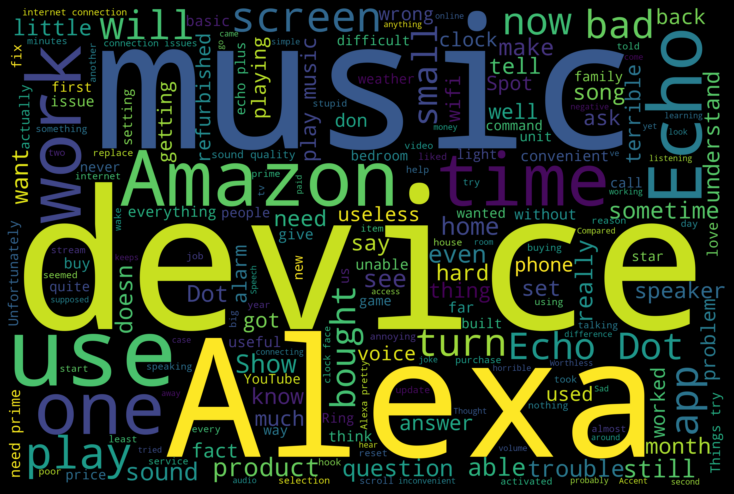

In [ ]:
negative = reviewData.loc[reviewData['Sentiment'] == 'Negative']
positive = reviewData.loc[reviewData['Sentiment'] == 'Positive']

print("Negative Words")
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = negative['verified_reviews'].values
wordcloud = WordCloud(
width=3000,
height=2000,
background_color = 'black',
stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
figsize=(10,10),
facecolor = 'k',
edgecolor = 'k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Positive Words


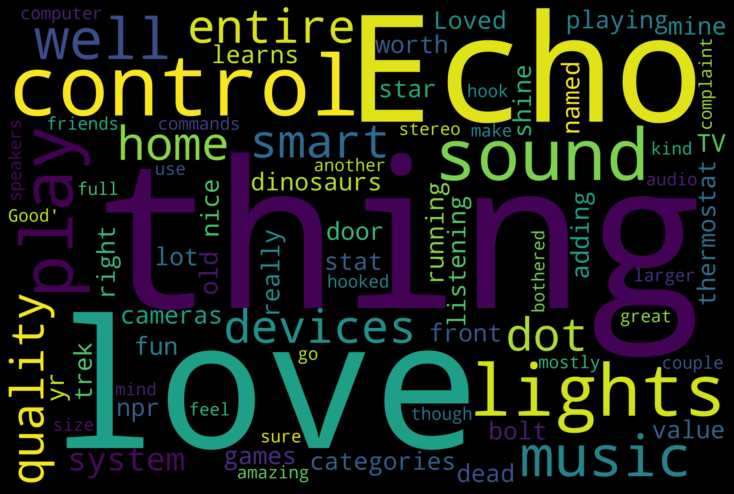

In [ ]:
negative = reviewData.loc[reviewData['Sentiment'] == 'Negative']
positive = reviewData.loc[reviewData['Sentiment'] == 'Positive']

print("Positive Words")
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = positive['verified_reviews'].values
wordcloud = WordCloud(
width=3000,
height=2000,
background_color = 'black',
stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
figsize=(10,10),
facecolor = 'k',
edgecolor = 'k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
reviewData[(reviewData['Sentiment']=='Positive')]

,rating,date,variation,verified_reviews,feedback,cleaned_verified_reviews,Sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo,Positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,love,Positive
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing old learn dinosaurs control ligh...,Positive
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,receive echo gift need another bluetooth somet...,Positive
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,without cellphone cannot use many feature ipad...,Positive
...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect kid adults everyone,Positive
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listen music search locations check time look ...,Positive
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,love things run entire home tv light thermosta...,Positive
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,complaint sound quality great mostly use comma...,Positive


In [ ]:
reviewData.loc[0]

rating                                     5
date                               31-Jul-18
variation                   Charcoal Fabric 
verified_reviews               Love my Echo!
feedback                                   1
cleaned_verified_reviews           love echo
Sentiment                           Positive
Name: 0, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
# Splitting data into train and validation
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(reviewData['cleaned_verified_reviews'], reviewData['Sentiment'], test_size=0.25, random_state=1)
# TFIDF feature generation for a maximum of around 5000 features
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
#print(encoder.get_feature_names())
print(train_y)
print(valid_y)

[2 1 2 ... 2 1 2]
[0 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 1 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 1 1 2 2 1 2 2 2 2 1 2 1 1 2 2 2 2 2
 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 0 2 1 2 2 1 2 2 0 1 2 2 2 2 2 2 2 0 0
 2 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 1 1 2 0 2 1 2
 2 2 2 0 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 0 1 1 2 2 2
 2 2 0 2 2 0 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 1
 2 2 0 2 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 1 2 2 2 2 2 1 2 2 2 1 2 2 1 1
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2
 1 1 2 

In [ ]:
tfidf_vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english', analyzer='word', token_pattern=r'\w{1,}')

#tfidf_vect.fit(reviewData['cleaned_verified_reviews'])
xtrain_tfidf = tfidf_vect.fit_transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)
print(tfidf_vect.get_feature_names())
features = tfidf_vect.get_feature_names()
print(xtrain_tfidf)
print(xvalid_tfidf)
pd.DataFrame(data = xtrain_tfidf.toarray(), columns = features).iloc[:, 0::2]

['abide', 'abilities', 'ability', 'absolutely', 'absolutly', 'accent', 'acceptable', 'access', 'accessable', 'accessible', 'accessories', 'accident', 'accidentally', 'accomplish', 'accord', 'accordingly', 'account', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'act', 'action', 'activate', 'activities', 'actually', 'ad', 'adapt', 'adapter', 'add', 'addict', 'addition', 'additional', 'additionally', 'addons', 'adept', 'adequate', 'adjacent', 'adjust', 'adjustment', 'adopters', 'adorable', 'ads', 'adults', 'advance', 'advantage', 'advertise', 'advertisement', 'advice', 'advise', 'aesthetic', 'af', 'affirm', 'afford', 'affordable', 'afraid', 'afternoon', 'age', 'ago', 'agree', 'agreement', 'ahead', 'ai', 'aide', 'air', 'aka', 'al', 'alabama', 'alarm', 'alcohol', 'alert', 'alex', 'alexa', 'alexas', 'alexi', 'alexia', 'alexis', 'alexus', 'algo', 'alive', 'alleviate', 'allow', 'allrecipes', 'alot', 'alots', 'alread', 'alright', 'alternative', 'alternatives', 'amaonmazing

,abide,ability,absolutly,acceptable,accessable,accessories,accidentally,accord,account,accurately,acknowledge,act,activate,actually,adapt,add,addition,additionally,adept,adjacent,adjustment,adorable,adults,advantage,advertisement,advise,af,afford,afraid,age,agree,ahead,aide,aka,alabama,alcohol,alex,alexas,alexia,alexus,...,wave,ways,wealth,weather,website,wed,weekday,weekend,weight,welcome,whatsoever,whisper,white,wi,wife,wikipedia,wireless,wonder,wonderfully,woofers,work,workout,world,worse,worth,worthy,wow,wrong,xfinity,yard,yeah,years,yellow,yes,yhe,young,youre,youve,yup,zigbee
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.456497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.286033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2358,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2359,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2360,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Model training
# we have defined a generalized function for training any given model:
from sklearn.metrics import precision_score
 
def train_model(classifier, feature_vector_train, label,feature_vector_valid, is_neural_net=False):
 # fit the training dataset on the classifier
 classifier.fit(feature_vector_train, label)
 # predict the labels on validation dataset
 predictions = classifier.predict(feature_vector_valid)
 precision=precision_score(valid_y,predictions,average='weighted')
 print("Precision score : ", precision)
 return metrics.accuracy_score(predictions, valid_y)
# NaiveBayes Classifier
accuracy = train_model(naive_bayes.MultinomialNB(alpha=0.001),xtrain_tfidf, train_y, xvalid_tfidf)
print("Accuracy: ", accuracy)

Precision score :  0.870665122247584
Accuracy:  0.8654822335025381


In [ ]:
# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(),xtrain_tfidf, train_y, xvalid_tfidf)
print ("Accuracy: ", accuracy)

Precision score :  0.8667287988165507
Accuracy:  0.9022842639593909


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# SVM classifier
from sklearn import svm
accuracy = train_model(svm.LinearSVC(),xtrain_tfidf, train_y, xvalid_tfidf)
print ("Accuracy: ", accuracy)


Precision score :  0.9436247738735125
Accuracy:  0.9416243654822335


In [ ]:
# SVM classifier with Poly filter
accuracy = train_model(svm.SVC(kernel='poly'),xtrain_tfidf, train_y, xvalid_tfidf)
print ("Accuracy: ", accuracy)

Precision score :  0.894443459605339
Accuracy:  0.881979695431472


In [ ]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
entropy = DecisionTreeClassifier(criterion='entropy',random_state = 0) 
accuracy = train_model(entropy,xtrain_tfidf, train_y, xvalid_tfidf)
print ("Accuracy: ", accuracy)
dot_data = StringIO()
export_graphviz(entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

Precision score :  0.9261966706245168
Accuracy:  0.9251269035532995


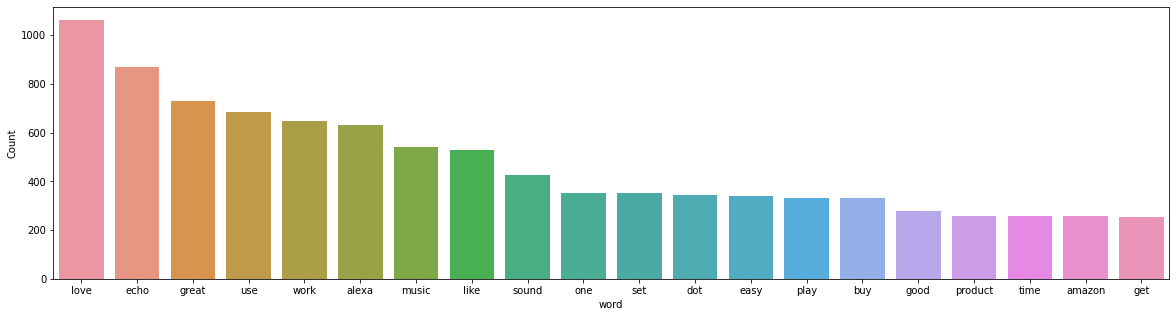

In [ ]:
#frequency graph
from nltk import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
all_words = ' '.join([text for text in reviewData['cleaned_verified_reviews']])
all_words = all_words.split()
fdist = FreqDist(all_words)
words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
d = words_df.nlargest(columns="count", n = 20) 
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "word", y = "count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:

tokenisedreviews=[d.split() for d in reviewData['cleaned_verified_reviews']]
dictionary = corpora.Dictionary(tokenisedreviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenisedreviews]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
lda_model.print_topics()

[(0,
  '0.042*"good" + 0.038*"sound" + 0.035*"speaker" + 0.031*"work" + 0.026*"great" + 0.025*"quality" + 0.020*"nice" + 0.017*"device" + 0.015*"amaze" + 0.014*"expect"'),
 (1,
  '0.035*"like" + 0.027*"love" + 0.024*"buy" + 0.023*"one" + 0.023*"alexa" + 0.017*"get" + 0.014*"new" + 0.014*"amazon" + 0.014*"dot" + 0.013*"would"'),
 (2,
  '0.064*"great" + 0.056*"work" + 0.025*"like" + 0.020*"music" + 0.019*"echo" + 0.017*"better" + 0.015*"product" + 0.013*"well" + 0.013*"make" + 0.013*"would"'),
 (3,
  '0.059*"easy" + 0.052*"echo" + 0.051*"use" + 0.042*"set" + 0.024*"sound" + 0.024*"love" + 0.021*"still" + 0.019*"dot" + 0.018*"learn" + 0.017*"quality"'),
 (4,
  '0.050*"music" + 0.039*"play" + 0.031*"love" + 0.024*"alexa" + 0.020*"one" + 0.017*"echo" + 0.014*"alarm" + 0.013*"use" + 0.013*"want" + 0.012*"need"'),
 (5,
  '0.132*"love" + 0.022*"echo" + 0.021*"hub" + 0.020*"alexa" + 0.019*"dot" + 0.018*"light" + 0.012*"bulbs" + 0.011*"plus" + 0.011*"build" + 0.010*"hop"'),
 (6,
  '0.038*"home" 

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.125338  0.017886       1        1  19.982450
1     -0.077672 -0.040730       2        1  18.098988
2      0.084508  0.083478       3        1  17.992954
3      0.049512 -0.001031       4        1  15.601765
6     -0.085120  0.239346       5        1  12.356209
5     -0.145590 -0.229161       6        1   8.313351
0      0.299700 -0.069789       7        1   7.654283, topic_info=        Term        Freq       Total Category  logprob  loglift
1       love  986.000000  986.000000  Default  30.0000  30.0000
93      easy  352.000000  352.000000  Default  29.0000  29.0000
78      work  593.000000  593.000000  Default  28.0000  28.0000
51     great  671.000000  671.000000  Default  27.0000  27.0000
21     music  567.000000  567.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
202  product   30.790645  219.710811   Topic7  -4.5559   0.6048
26      well   26.367039  171.028230   Topic7  -4.7110   0.7002
162  command   21.224205   88.381596   Topic7  -4.9279   1.1434
2      alexa   21.037329  587.045354   Topic7  -4.9368  -0.7589
25     thing   20.385471  127.730453   Topic7  -4.9682   0.7348

[467 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
696       1  0.885674     ability
696       6  0.073806     ability
732       3  0.247950  absolutely
732       6  0.719055  absolutely
498       4  0.955149      across
...     ...       ...         ...
289       6  0.017836       would
289       7  0.053507       would
92        2  0.979160        year
68        1  0.292704         yet
68        5  0.697988         yet

[679 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 4, 7, 6, 1])

In [ ]:
from sklearn.cluster import KMeans

negative = reviewData.loc[reviewData['Sentiment'] == 'Negative']
positive = reviewData.loc[reviewData['Sentiment'] == 'Positive']

positive_reviews = positive.head(121)


#positive.head()
#print(negative.shape[0])
#print(positive.shape[0])

combined_reviews = pd.concat([negative,positive_reviews])

#Combined data of 121 negative and positive reviews


model = KMeans(n_clusters=2, init='k-means++', max_iter=1000)

vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')
vectorizer.fit(reviewData['verified_reviews'])

X_train = vectorizer.transform(reviewData['verified_reviews'])
vocab = vectorizer.get_feature_names()
sse_err = []
res = model.fit(X_train)
vocab = np.array(vocab)
cluster_centers = np.array(res.cluster_centers_)
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-10:]]))
words=list(words)

words


Reviews = {'Reviews': reviewData['verified_reviews'].tolist(), 'Cluster': model.labels_.tolist()}
frame = pd.DataFrame(Reviews, index = [model.labels_.tolist()])
frame[frame['Cluster'] == 0]

,Reviews,Cluster
0,Love my Echo!,0
0,"Love, Love, Love!!",0
0,"I love it, wife hates it.",0
0,Sounds great!! Love them!,0
0,Great,0
...,...,...
0,Works great!,0
0,Love it. Added it to an upstairs bedroom,0
0,Love it,0
0,It works great!!,0
